## Homework 5

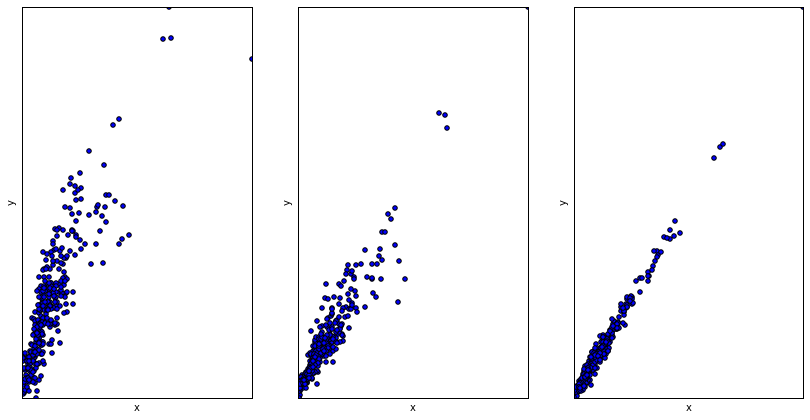

In [4]:
%matplotlib inline
import numpy as np 
from sklearn import decomposition # PCA
from sklearn.cross_validation import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
data = np.genfromtxt('04car.txt')
data_scaled = StandardScaler().fit_transform(data)

y = data_scaled[:,0]
X = data_scaled[:,2:data_scaled.shape[1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size=0.1, random_state=0)

n, p = X_train.shape
degrees = [1, 2, 3]
error = np.zeros(len(degrees)) # training error
ncv = 10 # number of cross valiation 
scores = np.zeros((len(degrees),ncv)) # cv error


plt.figure(figsize=(14, 7))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=True)
    linear_regression = LinearRegression()

    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X_train, y_train)
    error[i] = ((pipeline.predict(X_train) - y_train)**2).sum()
    
    yhat = pipeline.predict(X_train)

    # Evaluate the models using crossvalidation
    scores[i,] = cross_validation.cross_val_score(pipeline,
        X_train, y_train, scoring="mean_squared_error", cv=ncv)
    
    plt.scatter(y_train, yhat)
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((min(y_train), max(y_train)))
    plt.ylim((min(yhat), max(yhat)))